# Imports

In [1]:
from matplotlib import pyplot as plt
from utils import load_pickle, save_pickle, show_mel

import torch

In [10]:
n = '01' # Experiment number

## Generated Melspectrograms

Initialising methods

In [6]:
# Plots all image content of buffer (unless limit is specified)
def plot_buffer(buffer, limit=None):
    for i, d in enumerate(buffer.data):
        if(limit and i == limit): return
        mel = torch.squeeze(d).cpu().numpy()
        show_mel(mel)

In [7]:
# Plots one image from each epoch
def plot_improvement(AorB, maxepoch):
    
    assert AorB == 'A' or AorB == 'B', 'Choose a buffer'
    
    for i in range(maxepoch):
        if AorB == 'A':
            buffer = load_pickle('pool/'+n+'/a/a_fake_epoch_'+ str(i) +'.pickle')
        if AorB == 'B':
            buffer = load_pickle('pool/'+n+'/b/b_fake_epoch_'+ str(i) +'.pickle')
        plot_buffer(buffer, 1)
        
    return

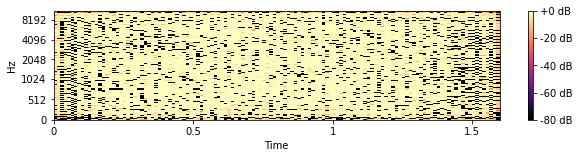

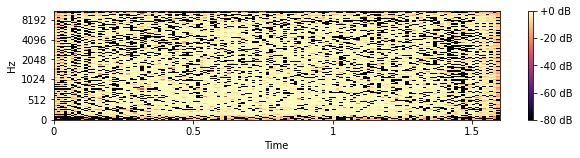

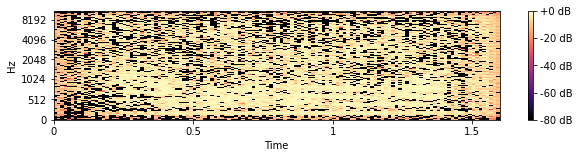

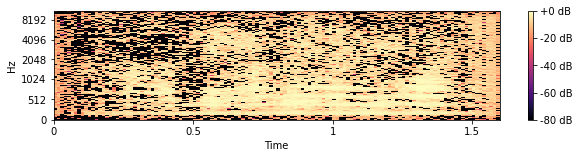

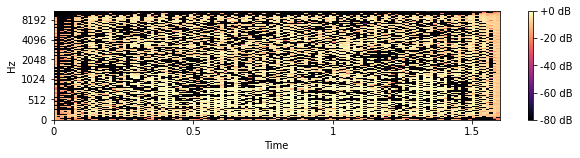

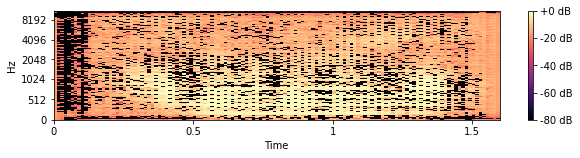

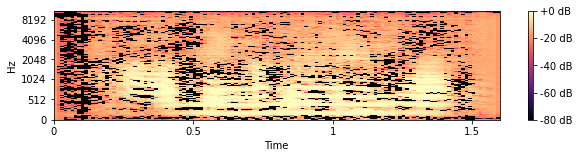

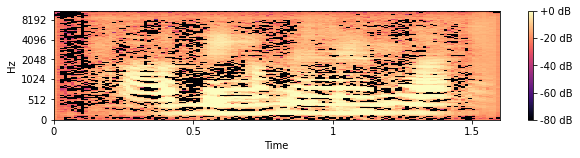

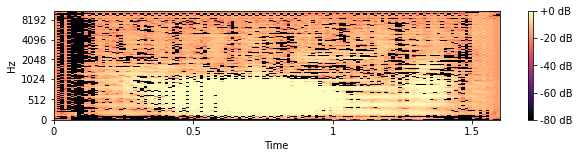

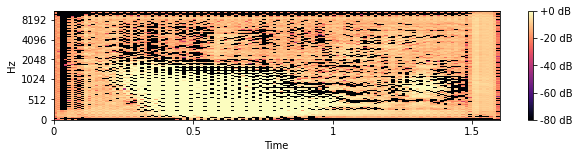

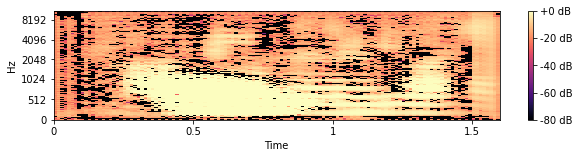

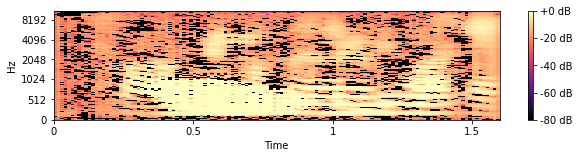

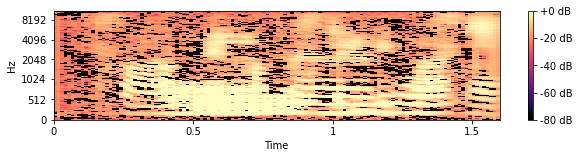

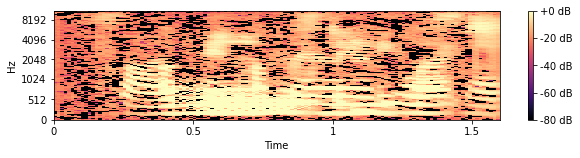

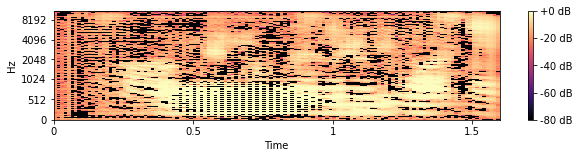

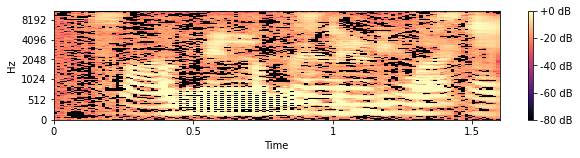

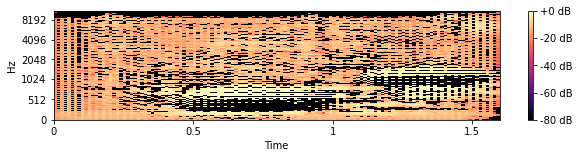

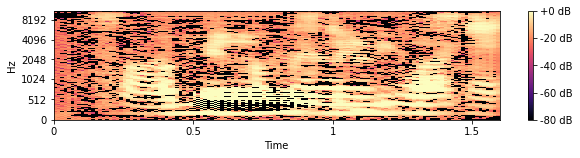

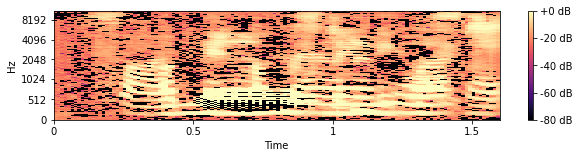

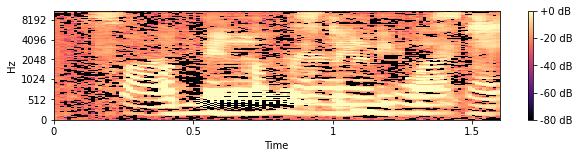

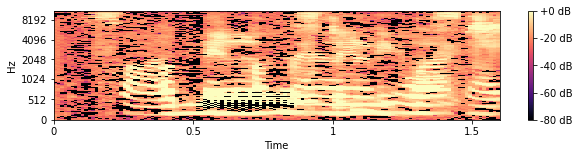

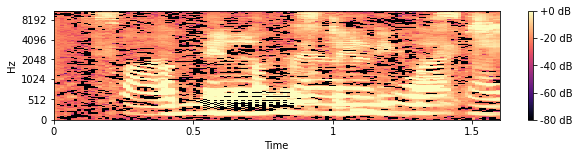

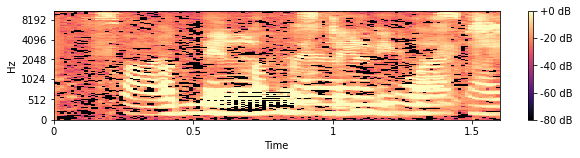

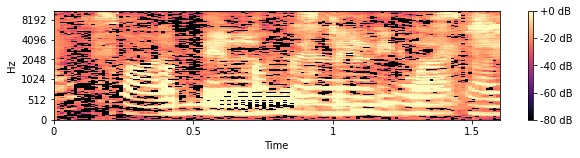

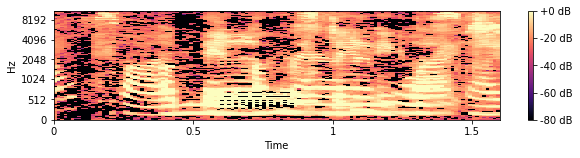

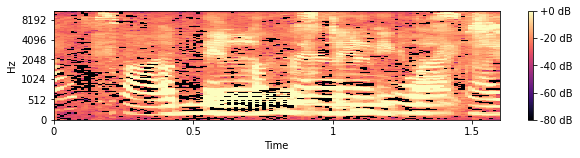

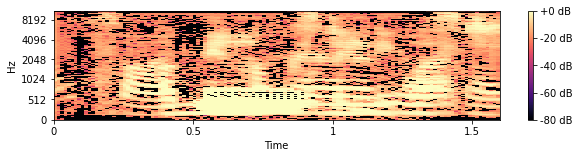

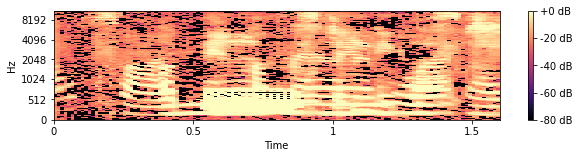

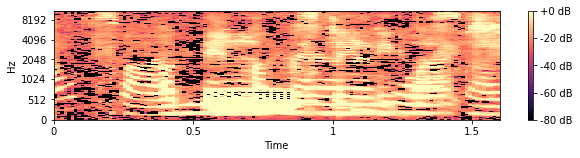

In [15]:
plot_improvement('A', 29)

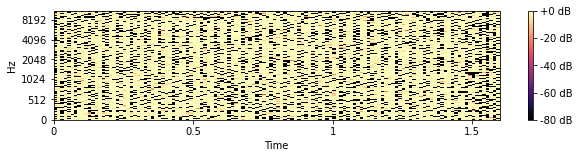

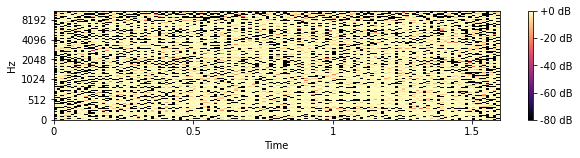

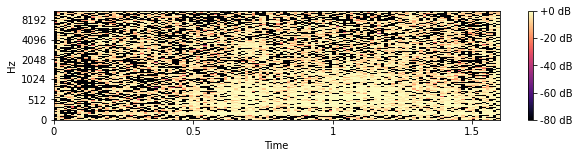

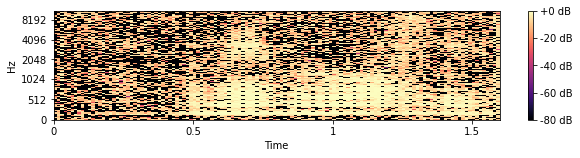

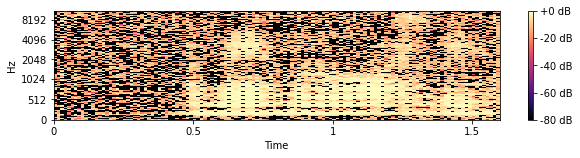

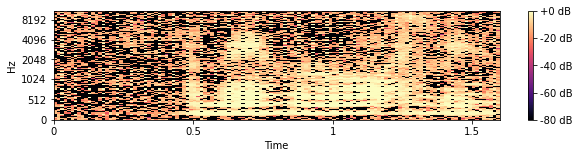

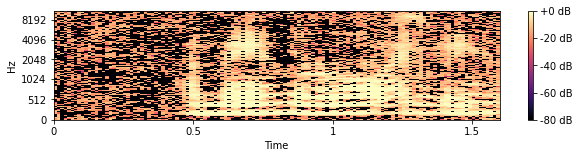

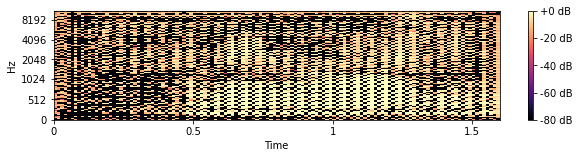

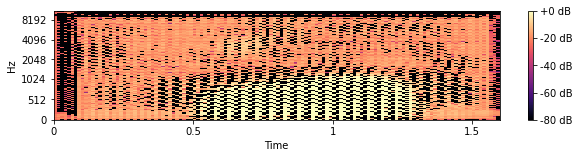

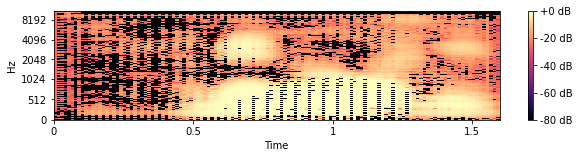

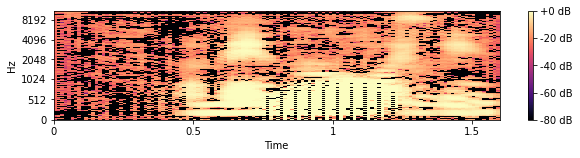

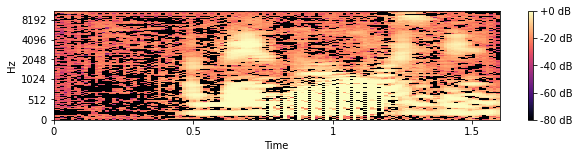

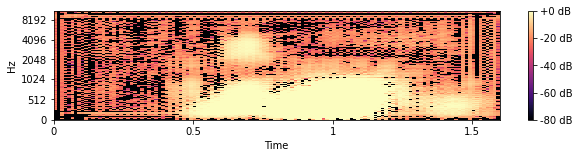

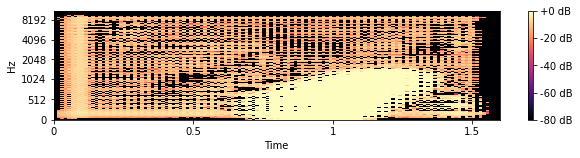

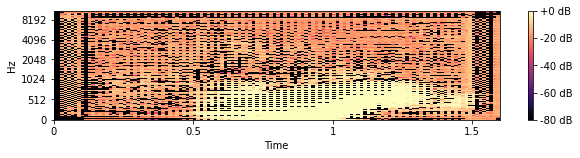

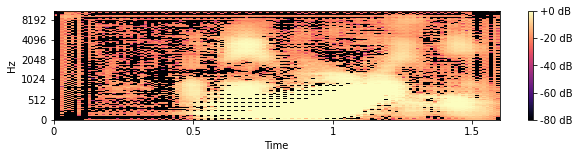

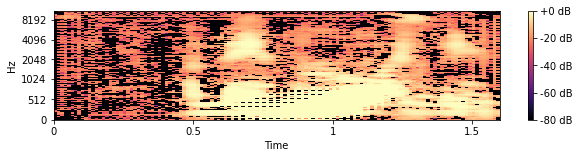

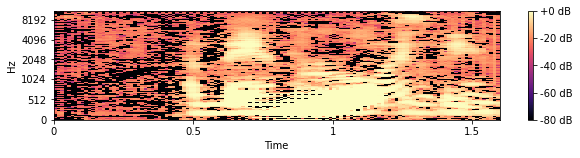

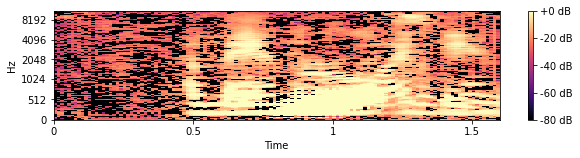

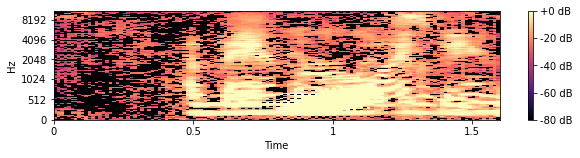

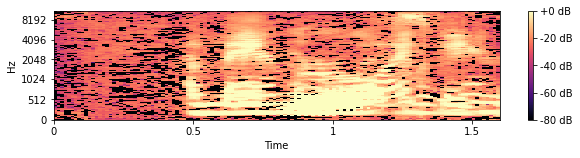

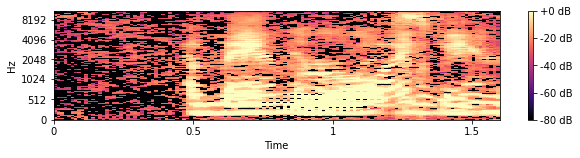

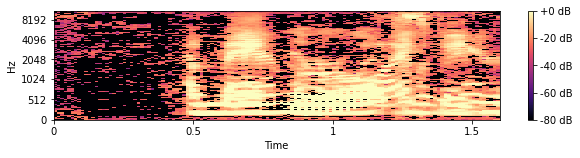

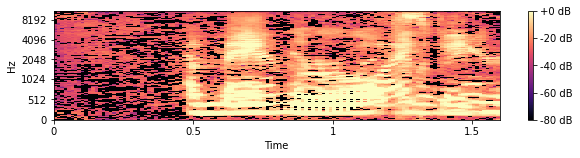

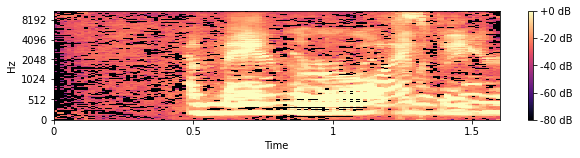

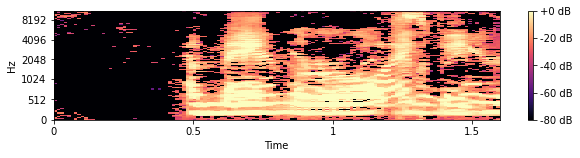

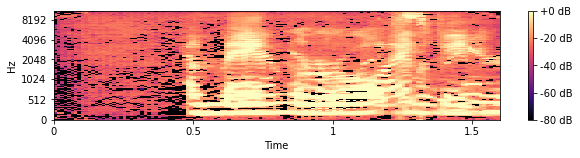

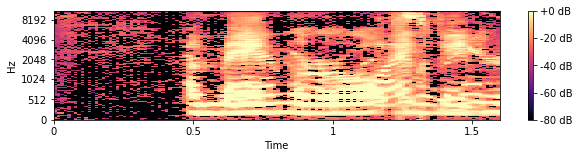

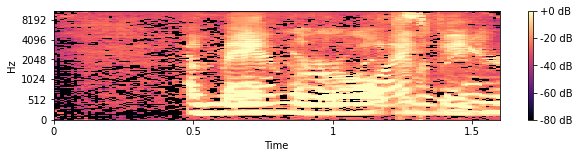

In [16]:
plot_improvement('B', 29)

## Loss Graphs

Initialising method and loading main dictionary

In [11]:
def plot_train_hist(train_hist, names, title, ylim=None):
    x = range(len(train_hist[names[0]]))

    plt.figure()
    plt.title(title)
    plt.xlabel('Iteration')
    plt.ylabel('Loss')
    
    for n in names:
        plt.plot(x, train_hist[n], label=n)

    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    
    if(ylim): plt.ylim(ylim)
    
train_hist = load_pickle('pool/'+n+'/train_hist.pickle')

### Generator A2B Path

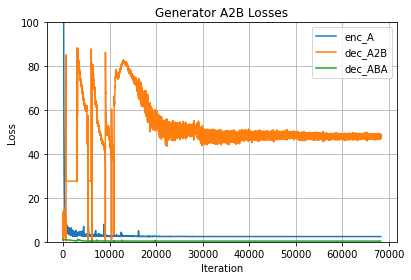

In [12]:
plot_train_hist(train_hist, ['enc_A', 'dec_A2B', 'dec_ABA'], 'Generator A2B Losses', ylim=(0,100))

### Generator B2A Path

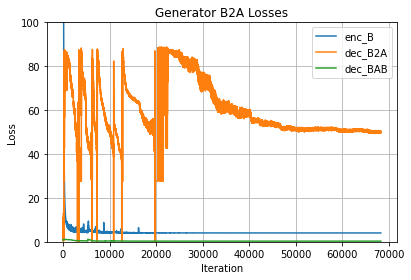

In [13]:
plot_train_hist(train_hist, ['enc_B', 'dec_B2A', 'dec_BAB'], 'Generator B2A Losses', ylim=(0,100))

### Discriminators A and B

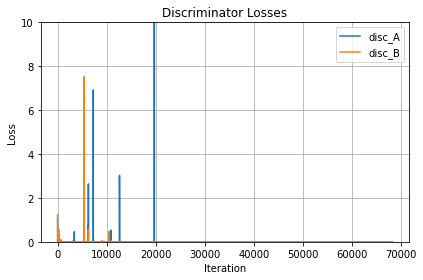

In [14]:
plot_train_hist(train_hist, ['disc_A', 'disc_B'], 'Discriminator Losses', ylim=(0,10))